In [2]:
using LinearAlgebra
using Distributions
using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [330]:
using DataFrames
using StatsPlots

In [10]:
include("../newtrinos/theory/osc.jl")

Main.osc

In [11]:
pdict = copy(osc.Darkdim_params_L)

OrderedCollections.OrderedDict{Any, Any} with 11 entries:
  :θ₁₂            => 0.587252
  :θ₁₃            => 0.145426
  :θ₂₃            => 0.855629
  :δCP            => 1.0
  :Darkdim_radius => 0.374921
  :ca1            => 0.43
  :ca2            => 1.0
  :ca3            => 0.41
  :λ₁             => 0.42
  :λ₂             => 2.4
  :λ₃             => 1.7

In [76]:
result_SM = FileIO.load("bestfit_SM.jld2")["result"]

(θ₁₂ = 0.5000104413123696, θ₁₃ = 0.14854460594096183, θ₂₃ = 0.9164500432965004, δCP = 3.935513931979697, Δm²₂₁ = 7.999932718361998e-5, Δm²₃₁ = 0.0025335622272106674, H = 1)

In [239]:
FileIO.load("profile_ADD_test_smoothed.jld2")

Dict{String, Any} with 2 entries:
  "vals"    => [[0.001, 0.00143845, 0.00206914, 0.00297635, 0.00428133, 0.00615…
  "results" => (Δm²₃₁ = [0.00253351, 0.00253349, 0.00253357, 0.00253357, 0.0025…

In [241]:
results_ADD = FileIO.load("profile_ADD_test_smoothed.jld2")["results"]
vals_ADD = FileIO.load("profile_ADD_test_smoothed.jld2")["vals"]

1-element Vector{Vector{Float64}}:
 [0.001, 0.0014384498882876629, 0.0020691380811147897, 0.002976351441631318, 0.004281332398719393, 0.006158482110660264, 0.008858667904100824, 0.012742749857031336, 0.018329807108324356, 0.02636650898730358, 0.037926901907322494, 0.054555947811685185, 0.07847599703514613, 0.11288378916846889, 0.16237767391887215, 0.2335721469090122, 0.33598182862837817, 0.48329302385717526, 0.6951927961775605, 0.9999999999999998]

In [91]:
p_SM = osc.osc_prob_SM(E, L, result_SM);

In [1511]:
# results = vcat([FileIO.load("profile_Darkdim_test_L_smoothed_20/idx_$i.jld2")["result"] for i in 1:19], 
#     [FileIO.load("profile_Darkdim_test_L_smoothed_10_more/idx_$i.jld2")["result"] for i in 1:10],
#     [FileIO.load("profile_Darkdim_test_L_smoothed_10_even_more/idx_$i.jld2")["result"] for i in 1:10],
#     [FileIO.load("profile_Darkdim_test_L_bfgs_randinit/idx_$i.jld2")["result"] for i in 1:10],
#     [FileIO.load("profile_Darkdim_test_L_bfgs_newseed/idx_$i.jld2")["result"] for i in 1:10],
#     [FileIO.load("profile_Darkdim_test_L_bfgs_newseed2/idx_$i.jld2")["result"] for i in 1:20],
#     [FileIO.load("profile_Darkdim_test_L_globalopt/idx_$i.jld2")["result"] for i in 1:1],
# )
# llhs = vcat([FileIO.load("profile_Darkdim_test_L_smoothed_20/idx_$i.jld2")["llh"] for i in 1:19],
#     [FileIO.load("profile_Darkdim_test_L_smoothed_10_more/idx_$i.jld2")["llh"] for i in 1:10],
#     [FileIO.load("profile_Darkdim_test_L_smoothed_10_even_more/idx_$i.jld2")["llh"] for i in 1:10],
#     [FileIO.load("profile_Darkdim_test_L_bfgs_randinit/idx_$i.jld2")["llh"] for i in 1:10],
#     [FileIO.load("profile_Darkdim_test_L_bfgs_newseed/idx_$i.jld2")["llh"] for i in 1:10],
#     [FileIO.load("profile_Darkdim_test_L_bfgs_newseed2/idx_$i.jld2")["llh"] for i in 1:20],
#     [FileIO.load("profile_Darkdim_test_L_globalopt/idx_$i.jld2")["llh"] for i in 1:1],
#)

In [1580]:
results = []
llhs = Float64[]

for dir in readdir(".")
    if startswith(dir, "profile_Darkdim_test_L") & isdir(dir)
        for file in readdir(dir)
            d = FileIO.load(joinpath(dir, file))
            push!(results, d["result"])
            push!(llhs, d["llh"])
        end
    end
end

In [1582]:
mask = (llhs .> -800);

llhs = llhs[mask];

s = Dict(key=>[x[key] for x in results][mask] for key in keys(first(results)))

df = DataFrame(s);

df.llh = llhs;

LoadError: BoundsError: attempt to access 157-element Vector{Float64} at index [148-element BitVector]

In [1583]:
sort(df, :llh, rev=true)

Row,Darkdim_radius,ca1,ca2,ca3,δCP,θ₁₂,θ₁₃,θ₂₃,λ₁,λ₂,λ₃,llh
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,4.78986,4.30871,2.29138,-9.99741,3.21687,0.5,0.142726,0.671028,0.127266,0.000292242,0.0878716,-434.629
2,5.01059,3.8359,1.98384,-9.4658,3.25507,0.608553,0.145594,0.669473,0.0949546,0.000558094,0.0903707,-434.865
3,4.0,3.92237,1.98373,-9.46601,3.25486,0.608201,0.144293,0.668998,0.133447,0.000558086,0.0903736,-434.891
4,4.64159,4.10348,2.15589,-9.91409,3.21516,0.500176,0.145252,0.669445,0.102986,0.000507075,0.0883312,-435.019
5,4.18433,4.14838,1.98374,-9.46587,3.2548,0.608221,0.14476,0.667379,0.127621,0.000558071,0.0904572,-435.101
6,4.57886,4.02405,2.15848,-9.31165,3.24499,0.500394,0.145885,0.669061,0.0982576,0.000522325,0.0911661,-435.158
7,5.48302,3.40337,1.75741,-9.33803,3.19249,0.500009,0.146192,0.67224,0.0656825,0.000516442,0.090896,-435.178
8,2.50529,3.99996,1.98377,-9.46609,3.25601,0.608085,0.143864,0.670785,0.221826,0.000558143,0.0902954,-435.247
9,3.59381,4.03222,2.11763,-9.73726,2.77238,0.504337,0.145985,0.668974,0.120946,0.000529681,0.0891519,-435.248


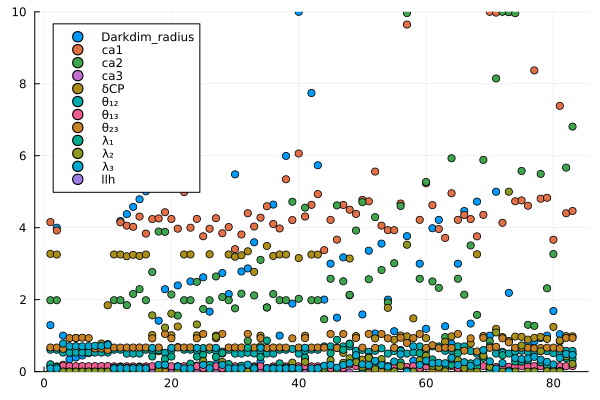

In [1584]:
@df df[idx,:] scatter(cols())
plot!(ylims=(0,10))

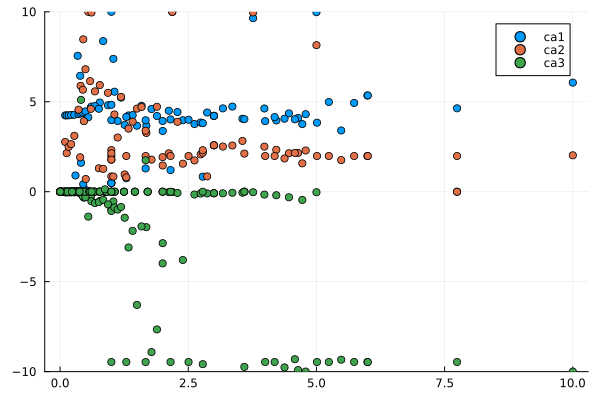

In [1585]:
scatter(df.Darkdim_radius, df.ca1, label="ca1")
scatter!(df.Darkdim_radius, df.ca2, label="ca2")
scatter!(df.Darkdim_radius, df.ca3, label="ca3")
plot!(ylims=(-10,10))

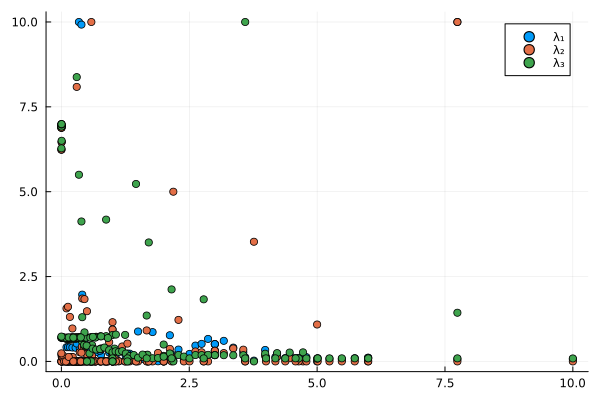

In [1586]:
scatter(df.Darkdim_radius, df.λ₁, label="λ₁")
scatter!(df.Darkdim_radius, df.λ₂, label="λ₂")
scatter!(df.Darkdim_radius, df.λ₃, label="λ₃")
#plot!(ylims=(0,2))

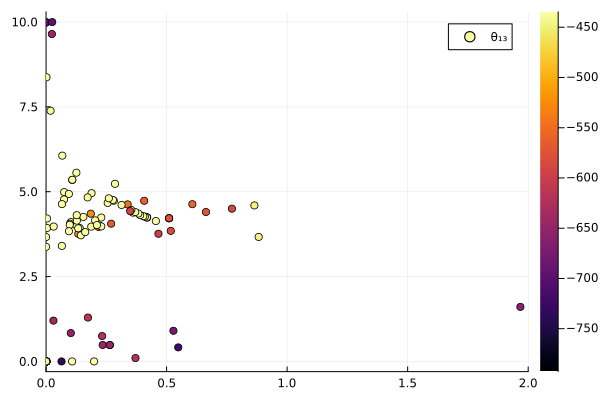

In [1587]:
scatter(df.λ₁, df.ca1, zcolor=df.llh, label="θ₁₃", xlims=(0,2))

In [1588]:
using LazySets

In [1589]:
maximum(df.llh)

-434.6293141374555

In [1596]:
y = (-2*(df.llh .- maximum(df.llh)))
x = df.Darkdim_radius
hull = convex_hull([[x[i],y[i]] for i in 1:length(x)] )
#plot(stack(hull)[1,:], sqrt.(stack(hull)[2,:]), label="Darkdim", color=theme_palette(:auto)[1], lw=2, ylims=(0,5), xlims=(1e-2,10), xscale=:log10)

scatter(x, sqrt.(y), label="Darkdim", color=theme_palette(:auto)[1] , ylims=(0,5), xlims=(1e-2,10), xscale=:log10)

y = -2*(results_ADD.llh .- maximum(results_ADD.llh))
x = stack(vals_ADD)
hull = convex_hull([[x[i],y[i]] for i in 1:length(x)] )
plot!(stack(hull)[1,:], sqrt.(stack(hull)[2,:]), label="ADD", lw=2)

hline!([sqrt(quantile(Chisq(1), 0.9))], label="90% CL", color=:black)
hline!([sqrt(quantile(Chisq(1), 0.99))], label="99% CL", ls=:dash, color=:black)

plot!(xlabel=L"$R_{ED}\ (\mu m)$")
plot!(ylabel=L"$\sqrt{-2\Delta LLH}$", minorgrid=true, legend=:topleft)

savefig("Darkdim_vs_ADD.png")

"/mnt/c/Users/peller/work/newtrinos/notebooks/Darkdim_vs_ADD.png"

┌ Error: Error watching manifest
│   exception =
│    MethodError: no method matching (::OpenSSL_jll.var"#make_wrapper_dict#6"{OpenSSL_jll.var"#parse_wrapper_platform#5"})(::String, ::Vector{String})
│    The function `make_wrapper_dict` exists, but no method is defined for this combination of argument types.
│    Stacktrace:
│     [1] top-level scope
│       @ ~/.julia/packages/JLLWrappers/jXOYx/src/toplevel_generators.jl:160
│    Revise evaluation error at /home/peller/.julia/packages/JLLWrappers/jXOYx/src/toplevel_generators.jl:160
│    
│    Stacktrace:
│     [1] methods_by_execution!(recurse::Any, methodinfo::Revise.CodeTrackingMethodInfo, docexprs::Dict{Module, Vector{Expr}}, mod::Module, ex::Expr; mode::Symbol, disablebp::Bool, always_rethrow::Bool, kwargs::@Kwargs{})
│       @ Revise ~/.julia/packages/Revise/vhmOR/src/lowered.jl:284
└ @ Revise ~/.julia/packages/Revise/vhmOR/src/pkgs.jl:495


In [1575]:
# Oscillation over arrays of Energy (E) and Lnegth (L)
function osc_prob_Darkdim_L(E, L, params)
    U, H = osc.get_Darkdim_L(params);

    p = stack(broadcast((e, l) -> osc.osc_kernel(U, H, e, l, damping=0), E, L'))

    Float64.(permutedims(p, (3, 4, 1, 2)))
end

osc_prob_Darkdim_L (generic function with 1 method)

In [1576]:
ps = [osc_prob_Darkdim_L(E, L, NamedTuple(sort(df, :llh, rev=true)[i, :])) for i in 1:1];

In [1577]:
E = 1
L = LinRange(0, 1e3, 1000);

In [1578]:
ps = []

for i in 1:length(results.llh)
    pdict = copy(osc.Darkdim_params_L)
    for key in keys(results)
        pdict[key] = results[key][i]
        end
    push!(ps, osc.osc_prob_Darkdim_L(E, L, NamedTuple(pdict));)
end

LoadError: type Array has no field llh

In [1579]:
flavs = ["e", "\\mu", "\\tau"];
labels = [latexstring("\$P_{$k \\rightarrow $j }\$") for k in flavs for j in flavs];

In [1412]:
colors = Plots.palette(:isoluminant_cm_70_c39_n256, length(ps), rev=true)

In [189]:
ca1s = 10 .^ LinRange(-1, 1., 50);
ps = []

for ca1 in ca1s
    pdict = copy(osc.Darkdim_params_L)
    pdict[:Darkdim_radius ] = 0.001
    pdict[:ca3] = ca1
    push!(ps, osc.osc_prob_Darkdim_L(E, L, NamedTuple(pdict));)
end

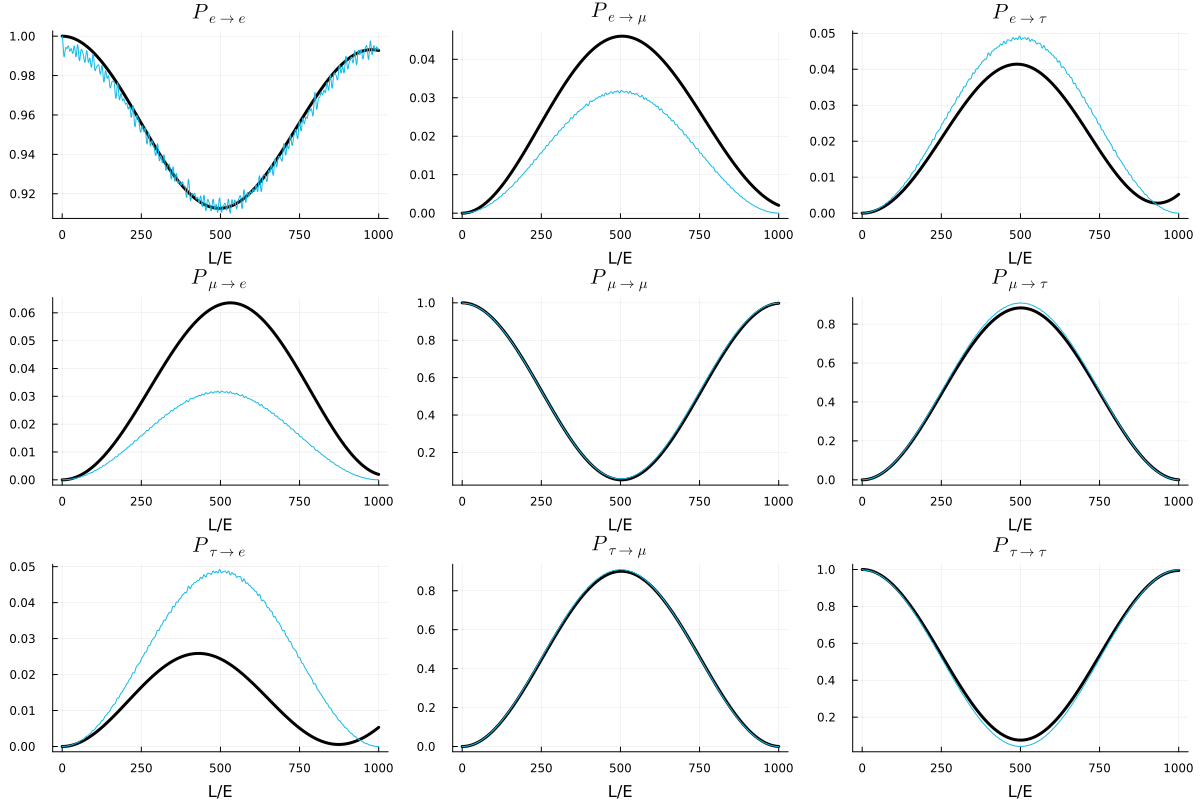

In [1416]:
p = plot(L./E, [p_SM[1, :, k, j] for k in 1:3 for j in 1:3], lw=3, layout=(3,3), size=(1200,800), titles = permutedims(labels), label=nothing, color="black") # label=@sprintf("ca1 = %.2f",ca1s[i]), 

for i in 1:length(ps)
    p = plot!(L./E, [ps[i][1, :, k, j] for k in 1:3 for j in 1:3], lw=1, layout=(3,3), size=(1200,800), titles = permutedims(labels), xlabel="L/E", label=nothing, palette=colors) #label=@sprintf("ca1 = %.2f",ca1s[i]), 
end
plot(p) #, ylims=(0,1))

In [285]:
using Distributions

In [286]:
x = 0:0.01:10

0.0:0.01:10.0

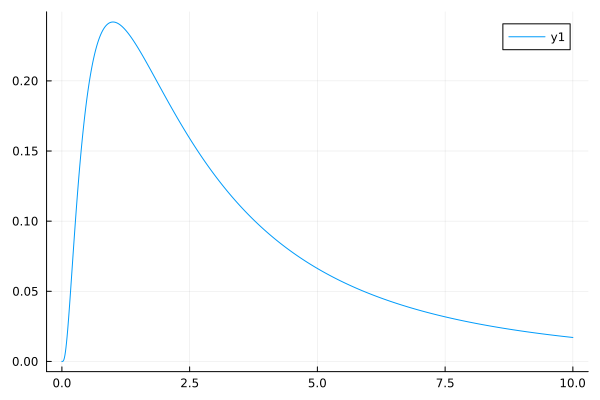

In [291]:
plot(x, pdf(TruLogNormal(1,1), x))